# TOPIC: P2P LENDING ANALYSIS REPORT
### Introduction 

What is peer-to-peer lending ? How does it work?

    Peer-to-peer (P2P) lending is a Practice of lending/investing or borrowing money from one private individual (“P2P Lender”) to another private individual (“P2P Borrower”).
    
   

In [1]:
# Load all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter

In [2]:
# Load the Data
p2p = pd.read_csv('p2p-lending-data.csv')
p2p

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,163477201,5000,5000,5000,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,...,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36 months,12.40%,668.12,B,B4,NaN,...,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60 months,15.24%,789.24,C,C2,Financial Analyst,...,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
3,162948736,19000,19000,18975,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,...,2895.90,2476.75,422.97,0.0,0.0,0.0,May-20,581.99,Jun-20,May-20
4,164131732,15000,15000,15000,36 months,7.02%,463.30,A,A2,Program Manager,...,1844.42,1518.32,326.10,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128253,158872331,3000,3000,3000,36 months,17.74%,108.07,C,C5,Machine operator,...,3032.52,3000.00,32.52,0.0,0.0,0.0,Nov-19,35.48,NaN,Sep-19
128254,158833440,10000,10000,10000,36 months,6.46%,306.31,A,A1,IT SUPERVISOR,...,2140.58,1796.14,344.44,0.0,0.0,0.0,May-20,306.31,Jun-20,May-20
128255,158748525,19000,19000,19000,36 months,6.46%,581.99,A,A1,Professor,...,4056.88,3412.67,644.21,0.0,0.0,0.0,May-20,581.99,Jun-20,May-20
128256,158298751,10000,10000,10000,60 months,28.80%,316.21,D,D5,NaN,...,2197.47,573.45,1624.02,0.0,0.0,0.0,May-20,316.21,Jun-20,May-20


In [3]:
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.
pd.options.display.max_columns = None

In [4]:
p2p

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,163477201,5000,5000,5000,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128xx,NY,15.17,0,May-08,685,689,1,NaN,NaN,4,0,2453,81.80%,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,Verified,Dec-19,Current,small_business,Business,986xx,WA,79.59,0,Dec-10,665,669,2,NaN,94.0,6,1,12325,59.30%,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480xx,MI,35.07,0,Dec-88,695,699,0,NaN,NaN,26,0,79282,46.40%,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
3,162948736,19000,19000,18975,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,Verified,Dec-19,Current,debt_consolidation,Debt consolidation,430xx,OH,20.68,0,Jun-97,785,789,1,NaN,NaN,7,0,11068,28.80%,10,f,16523.25,16501.51,2899.72,2895.90,2476.75,422.97,0.0,0.0,0.0,May-20,581.99,Jun-20,May-20
4,164131732,15000,15000,15000,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,310xx,GA,28.45,0,Aug-06,770,774,0,NaN,NaN,19,0,11023,20%,40,w,13481.68,13481.68,1844.42,1844.42,1518.32,326.10,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128253,158872331,3000,3000,3000,36 months,17.74%,108.07,C,C5,Machine operator,10+ years,OWN,44000.0,Not Verified,Oct-19,Fully Paid,credit_card,Credit card refinancing,136xx,NY,30.01,0,Apr-09,705,709,1,39.0,NaN,12,0,4599,35.90%,16,w,0.00,0.00,3032.52,3032.52,3000.00,32.52,0.0,0.0,0.0,Nov-19,35.48,NaN,Sep-19
128254,158833440,10000,10000,10000,36 months,6.46%,306.31,A,A1,IT SUPERVISOR,< 1 year,RENT,60000.0,Not Verified,Oct-19,Current,credit_card,Credit card refinancing,928xx,CA,14.18,0,Dec-08,750,754,0,NaN,NaN,7,0,18259,27.30%,10,w,8203.86,8203.86,2140.58,2140.58,1796.14,344.44,0.0,0.0,0.0,May-20,306.31,Jun-20,May-20
128255,158748525,19000,19000,19000,36 months,6.46%,581.99,A,A1,Professor,4 years,MORTGAGE,67350.0,Source Verified,Oct-19,Current,debt_consolidation,Debt consolidation,200xx,DC,6.00,0,Feb-07,680,684,0,36.0,NaN,6,0,21809,45.70%,10,w,15587.33,15587.33,4056.88,4056.88,3412.67,644.21,0.0,0.0,0.0,May-20,581.99,Jun-20,May-20
128256,158298751,10000,10000,10000,60 months,28.80%,316.21,D,D5,NaN,NaN,MORTGAGE,40000.0,Not Verified,Oct-19,Current,home_improvement,Home improvement,985xx,WA,2.10,0,Oct-91,660,664,0,NaN,16.0,6,1,1947,26.30%,27,w,9426.55,9426.55,2197.47,2197.47,573.45,1624.02,0.0,0.0,0.0,May-20,316.21,Jun-20,May-20


In [5]:
p2p.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,163477201,5000,5000,5000,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128xx,NY,15.17,0,May-08,685,689,1,NaN,NaN,4,0,2453,81.80%,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,Verified,Dec-19,Current,small_business,Business,986xx,WA,79.59,0,Dec-10,665,669,2,NaN,94.0,6,1,12325,59.30%,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480xx,MI,35.07,0,Dec-88,695,699,0,NaN,NaN,26,0,79282,46.40%,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
3,162948736,19000,19000,18975,36 months,6.46%,581.99,A,A1,Tech Ops Analyst,10+ years,MORTGAGE,83000.0,Verified,Dec-19,Current,debt_consolidation,Debt consolidation,430xx,OH,20.68,0,Jun-97,785,789,1,NaN,NaN,7,0,11068,28.80%,10,f,16523.25,16501.51,2899.72,2895.90,2476.75,422.97,0.0,0.0,0.0,May-20,581.99,Jun-20,May-20
4,164131732,15000,15000,15000,36 months,7.02%,463.30,A,A2,Program Manager,5 years,MORTGAGE,129000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,310xx,GA,28.45,0,Aug-06,770,774,0,NaN,NaN,19,0,11023,20%,40,w,13481.68,13481.68,1844.42,1844.42,1518.32,326.10,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20


In [6]:
p2p.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
128253,158872331,3000,3000,3000,36 months,17.74%,108.07,C,C5,Machine operator,10+ years,OWN,44000.0,Not Verified,Oct-19,Fully Paid,credit_card,Credit card refinancing,136xx,NY,30.01,0,Apr-09,705,709,1,39.0,NaN,12,0,4599,35.90%,16,w,0.00,0.00,3032.52,3032.52,3000.00,32.52,0.0,0.0,0.0,Nov-19,35.48,NaN,Sep-19
128254,158833440,10000,10000,10000,36 months,6.46%,306.31,A,A1,IT SUPERVISOR,< 1 year,RENT,60000.0,Not Verified,Oct-19,Current,credit_card,Credit card refinancing,928xx,CA,14.18,0,Dec-08,750,754,0,NaN,NaN,7,0,18259,27.30%,10,w,8203.86,8203.86,2140.58,2140.58,1796.14,344.44,0.0,0.0,0.0,May-20,306.31,Jun-20,May-20
128255,158748525,19000,19000,19000,36 months,6.46%,581.99,A,A1,Professor,4 years,MORTGAGE,67350.0,Source Verified,Oct-19,Current,debt_consolidation,Debt consolidation,200xx,DC,6.00,0,Feb-07,680,684,0,36.0,NaN,6,0,21809,45.70%,10,w,15587.33,15587.33,4056.88,4056.88,3412.67,644.21,0.0,0.0,0.0,May-20,581.99,Jun-20,May-20
128256,158298751,10000,10000,10000,60 months,28.80%,316.21,D,D5,NaN,NaN,MORTGAGE,40000.0,Not Verified,Oct-19,Current,home_improvement,Home improvement,985xx,WA,2.10,0,Oct-91,660,664,0,NaN,16.0,6,1,1947,26.30%,27,w,9426.55,9426.55,2197.47,2197.47,573.45,1624.02,0.0,0.0,0.0,May-20,316.21,Jun-20,May-20
128257,158206429,14875,14875,14875,36 months,16.95%,529.97,C,C4,NaN,NaN,MORTGAGE,150000.0,Source Verified,Oct-19,Current,credit_card,Credit card refinancing,773xx,TX,8.76,0,Jul-00,660,664,0,NaN,NaN,16,0,43530,71.80%,25,w,12538.83,12538.83,3695.78,3695.78,2336.17,1359.61,0.0,0.0,0.0,May-20,529.97,Jun-20,May-20


In [7]:
# Displays all column names.
p2p.columns.values


array(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d'],
      dtype=object)

In [8]:
# Displays column names, complete (non-missing) cases per column, and datatype per column.
p2p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128258 entries, 0 to 128257
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       128258 non-null  int64  
 1   loan_amnt                128258 non-null  int64  
 2   funded_amnt              128258 non-null  int64  
 3   funded_amnt_inv          128258 non-null  int64  
 4   term                     128258 non-null  object 
 5   int_rate                 128258 non-null  object 
 6   installment              128258 non-null  float64
 7   grade                    128258 non-null  object 
 8   sub_grade                128258 non-null  object 
 9   emp_title                109087 non-null  object 
 10  emp_length               117027 non-null  object 
 11  home_ownership           128258 non-null  object 
 12  annual_inc               128258 non-null  float64
 13  verification_status      128258 non-null  object 
 14  issu

# Check for missing values and clean

In [9]:
p2p.isnull().sum()

id                              0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                   19171
emp_length                  11231
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                           231
delinq_2yrs                     0
earliest_cr_line                0
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                  0
mths_since_last_delinq      72115
mths_since_last_record     115314
open_acc                        0
pub_rec       

### Loan Status

In [10]:
credit_status = pd.DataFrame({'Loan number':(p2p.loan_status.value_counts()),
                             'Percentage': (p2p.loan_status.value_counts()/len(p2p.loan_status)).to_list()})
credit_status

,Loan number,Percentage
Current,117482,0.915982
Fully Paid,7836,0.061096
Late (31-120 days),1134,0.008842
In Grace Period,857,0.006682
Charged Off,705,0.005497
Late (16-30 days),228,0.001778
Default,16,0.000125


In [11]:
#create new status
def credit_status(text):
    if text=='Fully Paid':
        return 'Fully Paid'
    elif text=='Charged Off'or text== 'Default':
        return 'Charged Off'
    elif text == 'Default':
        return 'Default'
    elif text=='Current' or text=='Issued':
        return 'Current'
    else:
        return 'PastDue'

p2p['credit_status']=p2p['loan_status'].apply(credit_status)

df_status= pd.DataFrame(p2p.groupby('credit_status')['credit_status'].count())
df_status= df_status.rename(columns={'credit_status': 'Loan number'})
df_status['percentages'] = df_status['Loan number']/sum(df_status['Loan number'])
df_status = df_status.sort_values('Loan number', ascending=False)
df_status

,Loan number,percentages
credit_status,,
Current,117482,0.915982
Fully Paid,7836,0.061096
PastDue,2219,0.017301
Charged Off,721,0.005621


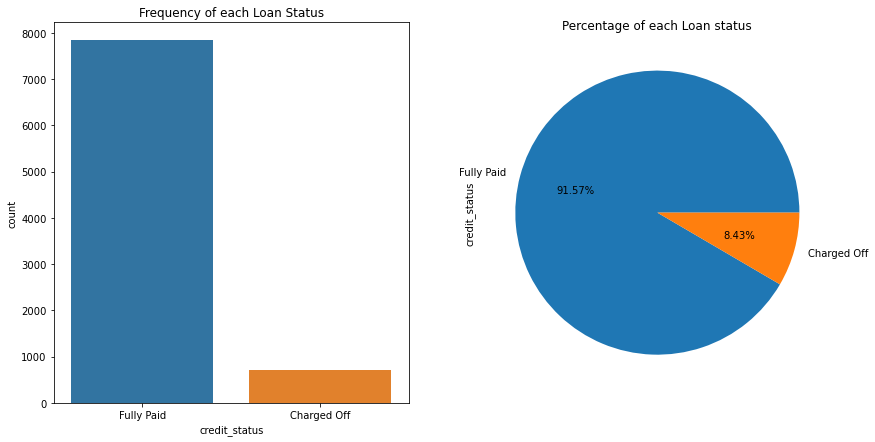

In [114]:
#Among 4 kinds of status, we only cares about 'Fully paid','Chareged off' and 'PastDue'
df_sub = p2p[(p2p["credit_status"] == "Fully Paid") |(p2p["credit_status"] == "Charged Off")]
filtered_loans = df_sub
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='credit_status',data=filtered_loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
filtered_loans.credit_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

### New DataFrame loan_missed and loan_completed

In [12]:
#Create new dataset loan_missed and loan_completed
loan_missed=pd.DataFrame(p2p[p2p['credit_status'].str.contains('Charged Off','Default')])


In [13]:
loan_completed = pd.DataFrame(p2p[p2p['loan_status'].str.contains('Fully Paid')])
loan_completed

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,credit_status
14,164193225,7500,7500,7500,36 months,12.40%,250.55,B,B4,Rn,7 years,RENT,159000.0,Verified,Dec-19,Fully Paid,credit_card,Credit card refinancing,946xx,CA,5.83,0,Sep-97,710,714,1,27.0,NaN,18,0,16195,30.70%,34,w,0.0,0.0,7732.700000,7732.70,7500.0,232.70,0.0,0.0,0.0,Apr-20,6639.35,NaN,Apr-20,Fully Paid
45,164190449,15000,15000,15000,60 months,23.05%,423.29,D,D3,Social Worker,7 years,MORTGAGE,63800.0,Source Verified,Dec-19,Fully Paid,credit_card,Credit card refinancing,666xx,KS,18.91,2,Aug-04,660,664,0,18.0,NaN,5,0,14275,69.60%,54,w,0.0,0.0,15134.460830,15134.46,15000.0,134.46,0.0,0.0,0.0,Feb-20,163.27,NaN,Jan-20,Fully Paid
48,164172308,6500,6500,6500,36 months,12.40%,217.14,B,B4,Driver,10+ years,MORTGAGE,71400.0,Not Verified,Dec-19,Fully Paid,other,Other,026xx,MA,4.97,0,Aug-94,730,734,1,NaN,NaN,4,0,3295,70.10%,9,f,0.0,0.0,6669.920000,6669.92,6500.0,169.92,0.0,0.0,0.0,Apr-20,1742.36,NaN,Apr-20,Fully Paid
49,164173227,10500,10500,10500,36 months,25.65%,421.10,D,D4,Commercial Security Account Consultant,1 year,MORTGAGE,140000.0,Source Verified,Dec-19,Fully Paid,debt_consolidation,Debt consolidation,300xx,GA,16.36,0,Mar-03,675,679,0,NaN,113.0,12,1,38114,65.30%,22,f,0.0,0.0,11250.380000,11250.38,10500.0,750.38,0.0,0.0,0.0,Apr-20,10430.62,NaN,Apr-20,Fully Paid
95,164178800,5300,5300,5300,36 months,20.55%,198.46,D,D2,Outside sales,< 1 year,RENT,80000.0,Not Verified,Dec-19,Fully Paid,small_business,Business,480xx,MI,14.27,0,Jun-92,740,744,1,NaN,NaN,6,0,3099,13.50%,12,w,0.0,0.0,5494.622500,5494.62,5300.0,194.62,0.0,0.0,0.0,Mar-20,106.78,NaN,May-20,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128152,158972524,35000,35000,35000,36 months,11.71%,1157.66,B,B3,Manager,10+ years,MORTGAGE,102000.0,Source Verified,Oct-19,Fully Paid,credit_card,Credit card refinancing,327xx,FL,29.13,0,Feb-07,710,714,3,NaN,97.0,32,1,35480,32%,47,w,0.0,0.0,36730.331320,36730.33,35000.0,1730.33,0.0,0.0,0.0,Mar-20,32145.23,NaN,Mar-20,Fully Paid
128197,159446197,24850,24850,24850,60 months,17.74%,627.52,C,C5,Avionics tech,2 years,OWN,62000.0,Source Verified,Oct-19,Fully Paid,home_improvement,Home improvement,325xx,FL,29.52,0,Aug-91,785,789,2,42.0,NaN,9,0,2698,5.20%,30,w,0.0,0.0,26494.380000,26494.38,24850.0,1644.38,0.0,0.0,0.0,Feb-20,24636.31,NaN,Apr-20,Fully Paid
128208,159058491,26575,26575,26575,36 months,20.55%,995.09,D,D2,Finance manager,3 years,RENT,130000.0,Source Verified,Oct-19,Fully Paid,other,Other,460xx,IN,12.52,0,Apr-11,670,674,0,68.0,41.0,10,1,20849,62.20%,24,f,0.0,0.0,28530.890000,28530.89,26575.0,1955.89,0.0,0.0,0.0,Mar-20,7080.87,NaN,Mar-20,Fully Paid
128251,158440255,8200,8200,8200,36 months,17.74%,295.39,C,C5,Bank Clerk,10+ years,MORTGAGE,65000.0,Source Verified,Oct-19,Fully Paid,debt_consolidation,Debt consolidation,112xx,NY,14.90,3,Apr-90,685,689,0,5.0,NaN,13,0,14345,42.80%,28,w,0.0,0.0,8730.623333,8730.62,8200.0,530.62,0.0,0.0,0.0,Feb-20,7860.61,NaN,Mar-20,Fully Paid


In [14]:
loan_missed

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,credit_status
414,164114717,22100,22100,22100,60 months,13.08%,503.75,B,B5,Professor,7 years,MORTGAGE,81700.0,Not Verified,Dec-19,Charged Off,home_improvement,Home improvement,063xx,CT,7.93,0,May-02,815,819,0,NaN,NaN,4,0,3644,16.60%,9,w,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,May-20,Charged Off
959,164146171,25875,25875,25875,36 months,13.08%,872.83,B,B5,Pharmacist,< 1 year,MORTGAGE,240000.0,Source Verified,Dec-19,Charged Off,home_improvement,Home improvement,799xx,TX,20.00,0,Nov-06,715,719,1,NaN,105.0,19,1,114971,11.80%,75,w,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,May-20,Charged Off
1270,163741132,10000,10000,10000,36 months,12.40%,334.06,B,B4,Partner,4 years,OWN,100000.0,Not Verified,Dec-19,Charged Off,home_improvement,Home improvement,604xx,IL,21.85,0,Mar-01,740,744,0,NaN,NaN,12,0,17273,38%,21,w,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,May-20,Charged Off
1971,164097310,26600,26600,26600,60 months,13.08%,606.33,B,B5,Director of business development,10+ years,MORTGAGE,106400.0,Not Verified,Dec-19,Charged Off,credit_card,Credit card refinancing,601xx,IL,19.32,1,Jul-86,760,764,0,6.0,NaN,7,0,8829,0%,16,w,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,May-20,Charged Off
2531,164057700,3600,3600,3600,36 months,16.12%,126.78,C,C3,Manager,10+ years,OWN,60000.0,Not Verified,Dec-19,Charged Off,credit_card,Credit card refinancing,286xx,NC,37.00,0,Aug-96,725,729,1,67.0,NaN,12,0,1973,5.90%,23,w,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,May-20,Charged Off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127490,159303166,22325,22325,22325,60 months,14.30%,522.95,C,C1,Account Executive,5 years,MORTGAGE,120000.0,Source Verified,Oct-19,Charged Off,credit_card,Credit card refinancing,481xx,MI,26.58,0,Jul-09,685,689,2,NaN,NaN,13,0,33594,38.10%,19,w,0.00,0.00,1028.16,1028.16,463.04,565.12,0.0,0.0,0.0,Dec-19,522.95,NaN,May-20,Charged Off
127497,159407216,1000,1000,1000,36 months,11.71%,33.08,B,B3,Manager,10+ years,OWN,42000.0,Verified,Oct-19,Charged Off,debt_consolidation,Debt consolidation,403xx,KY,0.00,0,Jul-83,735,739,1,NaN,NaN,2,0,0,0%,3,w,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,Apr-20,Charged Off
127529,159620410,6400,6400,6400,36 months,17.74%,230.55,C,C5,CNC Tech,2 years,MORTGAGE,72000.0,Not Verified,Oct-19,Default,other,Other,917xx,CA,24.02,0,Apr-97,680,684,5,66.0,NaN,9,0,7734,81.40%,15,w,5986.13,5986.13,685.34,685.34,413.87,271.47,0.0,0.0,0.0,Jan-20,230.55,Jun-20,May-20,Charged Off
128098,159332566,20000,20000,20000,60 months,13.08%,455.89,B,B5,driver,2 years,MORTGAGE,112000.0,Not Verified,Oct-19,Charged Off,small_business,Business,750xx,TX,20.00,0,Jan-06,765,769,3,NaN,NaN,22,0,8768,11.50%,32,w,0.00,0.00,1794.49,1794.49,967.23,827.26,0.0,0.0,0.0,Feb-20,455.89,NaN,May-20,Charged Off


### Purpose loan

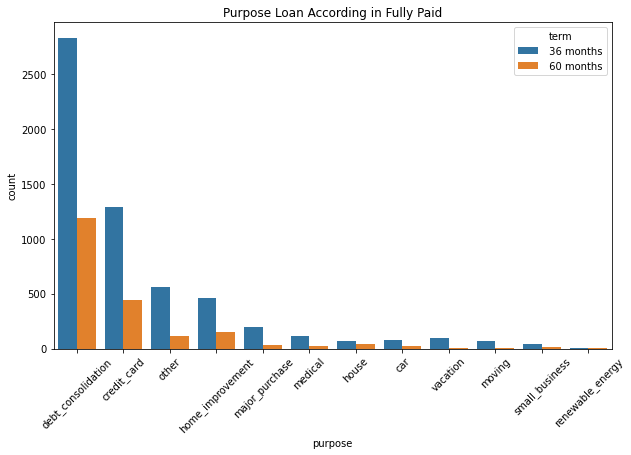

In [15]:
plt.figure(figsize = (10,6))

purpose_ = loan_completed['purpose']
plt.title('Purpose Loan According in Fully Paid')
sns.countplot(purpose_, data=loan_completed,order=loan_completed['purpose'].value_counts().index,hue='term')
plt.xticks(rotation=45)
plt.show()


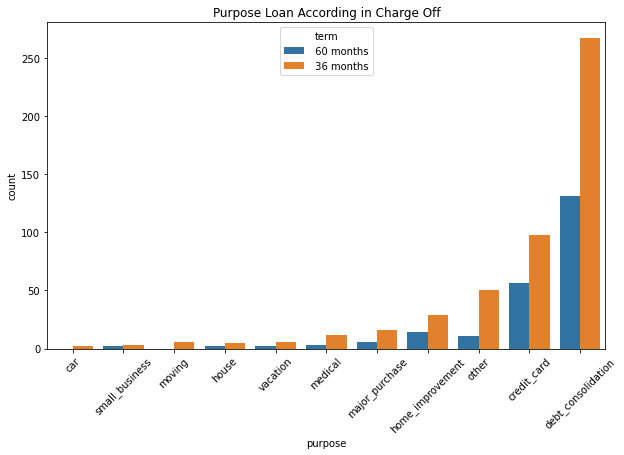

In [16]:
plt.figure(figsize = (10,6))

purpose_ = loan_missed['purpose']
plt.title('Purpose Loan According in Charge Off')
sns.countplot(purpose_, data=loan_missed,order=loan_missed['purpose'].value_counts().index[::-1],hue='term')
plt.xticks(rotation=45)
plt.show()

### Grade According in Fully Paid and Charge Off

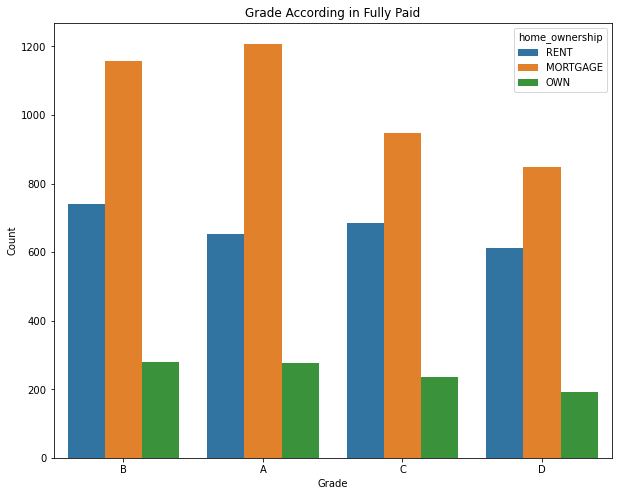

In [17]:
plt.figure(figsize = (10,8))

g = sns.countplot(x=loan_completed["grade"], data=loan_completed, order = loan_completed['grade'].value_counts().index,hue='home_ownership')
g.set_xlabel("Grade")
g.set_ylabel("Count")
g.set_title("Grade According in Fully Paid")

plt.show()

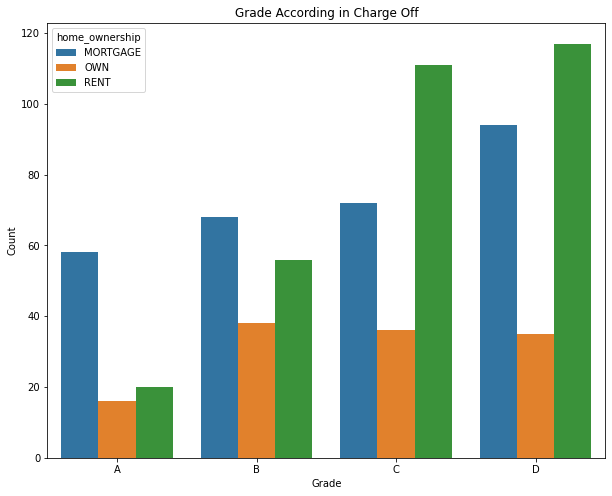

In [18]:
plt.figure(figsize = (10,8))

g = sns.countplot(x=loan_missed["grade"], data=loan_missed, order = loan_missed['grade'].value_counts().index[::-1],hue='home_ownership')
g.set_xlabel("Grade")
g.set_ylabel("Count")
g.set_title("Grade According in Charge Off")


plt.show()

### Annual income & interest rate in Fully paid and Charge Off

In [21]:
# Group amount range of annual income in loan completed
Low_inc = loan_completed["annual_inc"] < 50000
Medium_inc = (loan_completed["annual_inc"] >=  50000) & (loan_completed["annual_inc"] < 150000)
Hign_inc = (loan_completed["annual_inc"] >= 150000)
conditions = [Low_inc, Medium_inc, Hign_inc ]
choices = ["Low Amount", "Medium Amount", "High Amount"]
loan_completed["Income_range"] = np.select(conditions, choices)


In [83]:
#loan_completed['int_rate']=loan_completed['int_rate'].str.replace('%','').astype(float)

def int_range(rate):
    if rate <= 6.0:
        return '6%'
    elif rate <= 10.0:
        return '10%'
    elif rate <= 15.0:
        return '15%'
    elif rate <= 20.0:
        return '20%'
    elif rate <= 25.0:
        return '25%'
    else:
        return '30%'
loan_completed['int_range_range']=loan_completed['int_rate'].apply(int_range)
loan_completed['int_range_range'].unique()

array(['15%', '25%', '30%', '10%', '20%'], dtype=object)

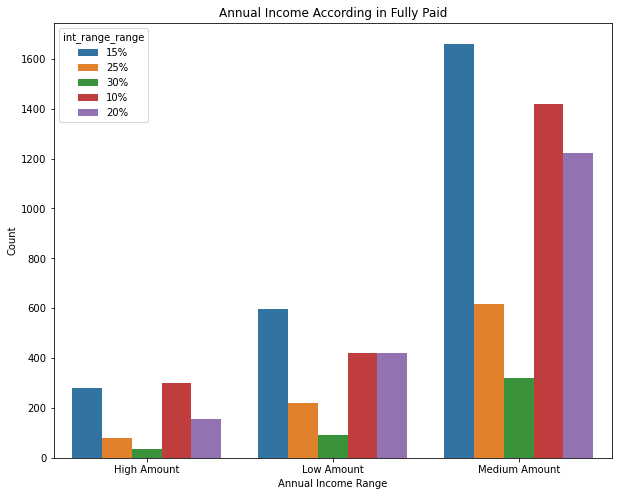

In [84]:
#Annual Income According in Fully Paid
plt.figure(figsize = (10,8))

g = sns.countplot(x=loan_completed["Income_range"], data=loan_completed, order = loan_completed['Income_range'].value_counts().index[::-1],hue='int_range_range')
g.set_xlabel("Annual Income Range")
g.set_ylabel("Count")
g.set_title("Annual Income According in Fully Paid")
plt.show()

In [23]:
# Group amount range of annual income in charge off
Low_inc = loan_missed["annual_inc"] < 50000
Medium_inc = (loan_missed["annual_inc"] >=  50000) & (loan_missed["annual_inc"] < 150000)
Hign_inc = (loan_missed["annual_inc"] >= 150000)
conditions = [Low_inc, Medium_inc, Hign_inc ]
choices = ["Low Amount", "Medium Amount", "High Amount"]
loan_missed["Income_range"] = np.select(conditions, choices)

In [87]:
#loan_missed['int_rate']=loan_missed['int_rate'].str.replace('%','').astype(float)

def int_range(rate):
    if rate <= 6.0:
        return '6%'
    elif rate <= 10.0:
        return '10%'
    elif rate <= 15.0:
        return '15%'
    elif rate <= 20.0:
        return '20%'
    elif rate <= 25.0:
        return '25%'
    else:
        return '30%'
loan_missed['int_range_range']=loan_missed['int_rate'].apply(int_range)
loan_missed['int_range_range'].unique()

array(['15%', '20%', '25%', '10%', '30%'], dtype=object)

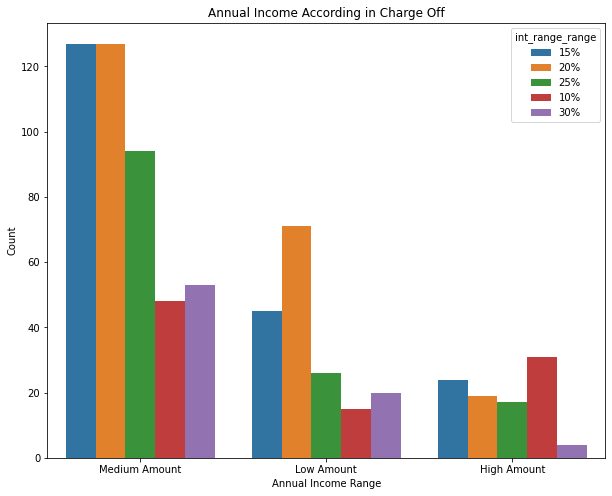

In [88]:
plt.figure(figsize = (10,8))

g = sns.countplot(x=loan_missed["Income_range"], data=loan_missed, order = loan_missed['Income_range'].value_counts().index,hue='int_range_range')
g.set_xlabel("Annual Income Range")
g.set_ylabel("Count")
g.set_title("Annual Income According in Charge Off")
plt.show()

### Amount loan and interest rate in Charge Off and Fully Paid

In [60]:
def amnt_loan_range(num):
    if num <= 5000:
        return '5K'
    elif num <= 10000:
        return '10K'
    elif num <= 20000:
        return '20K'
    elif num <= 30000:
        return '30K'
    else:
        return '40K'
loan_missed['amnt_loan_range']=loan_missed['loan_amnt'].apply(amnt_loan_range)
loan_completed['amnt_loan_range']=loan_completed['loan_amnt'].apply(amnt_loan_range)
loan_completed['amnt_loan_range'].unique()

array(['10K', '20K', '5K', '30K', '40K'], dtype=object)

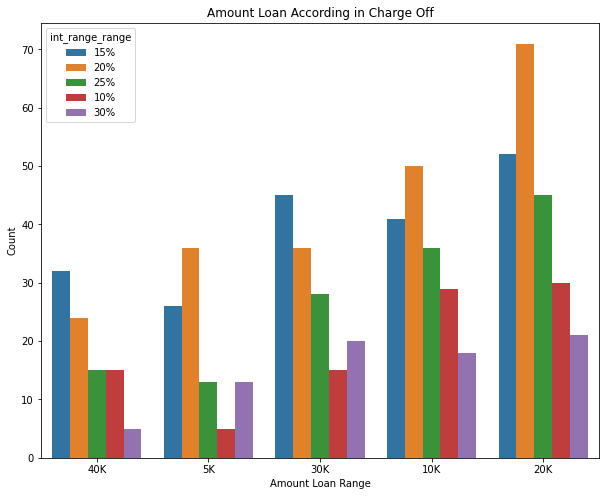

In [89]:
plt.figure(figsize = (10,8))

g = sns.countplot(x=loan_missed["amnt_loan_range"], data=loan_missed, order = loan_missed['amnt_loan_range'].value_counts().index[::-1],hue='int_range_range')
g.set_xlabel("Amount Loan Range")
g.set_ylabel("Count")
g.set_title("Amount Loan According in Charge Off")

plt.show()

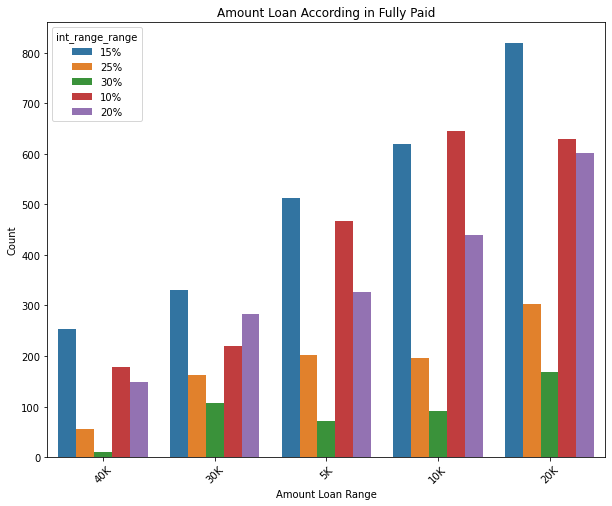

In [90]:
plt.figure(figsize = (10,8))

g = sns.countplot(x=loan_completed["amnt_loan_range"], data=loan_completed, order = loan_completed['amnt_loan_range'].value_counts().index[::-1],hue='int_range_range')
g.set_xlabel("Amount Loan Range")
g.set_ylabel("Count")
g.set_title("Amount Loan According in Fully Paid")

plt.xticks(rotation=45)
plt.show()


### Grade and interest Rate Accoring in Fully Paid and Charge Off

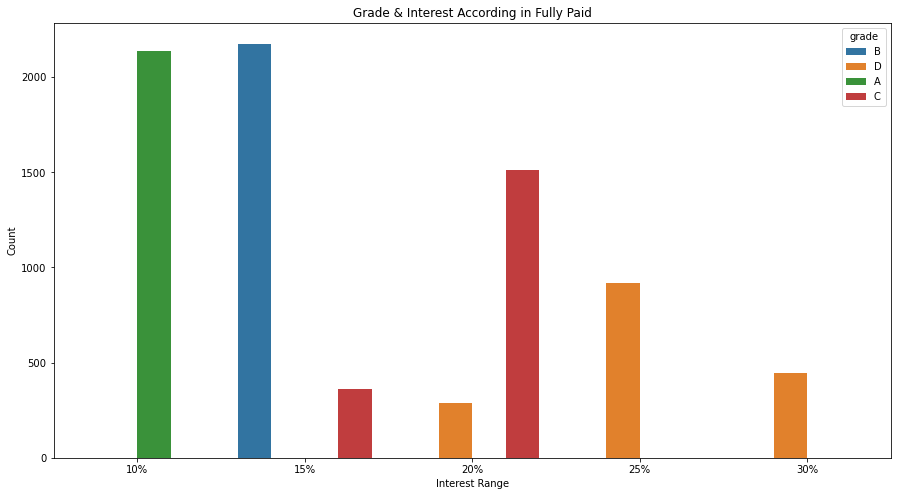

In [122]:
plt.figure(figsize = (15,8))

g = sns.countplot(x=loan_completed["int_range_range"], data=loan_completed, order = ['10%', '15%','20%','25%','30%'],hue='grade')
g.set_xlabel("Interest Range")
g.set_ylabel("Count")
g.set_title("Grade & Interest According in Fully Paid")

plt.show()

In [111]:
#loan_missed['int_rate']=loan_missed['int_rate'].str.replace('%','').astype(float)

def int_range(rate):
    if rate <= 6.0:
        return '6%'
    elif rate <= 10.0:
        return '10%'
    elif rate <= 15.0:
        return '15%'
    elif rate <= 20.0:
        return '20%'
    elif rate <= 25.0:
        return '25%'
    else:
        return '30%'
loan_missed['int_range_range']=loan_missed['int_rate'].apply(int_range)
loan_missed['int_range_range'].unique()

array(['15%', '20%', '25%', '10%', '30%'], dtype=object)

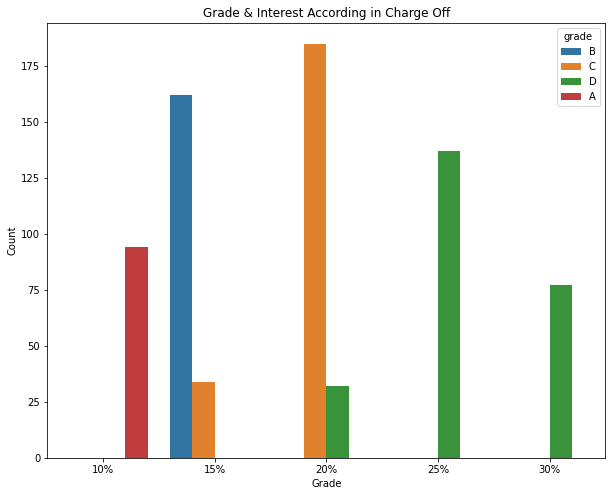

In [118]:
plt.figure(figsize = (10,8))

g = sns.countplot(x=loan_missed["int_range_range"], data=loan_missed, order =['10%', '15%','20%','25%','30%'],hue='grade')
g.set_xlabel("Grade")
g.set_ylabel("Count")
g.set_title("Grade & Interest According in Charge Off")

plt.show()